# permittivity-calc Tutorial

Everything you need to know about using permittivity-calc: [github.com/boivinalex/permittivity-calc](https://github.com/boivinalex/permittivity-calc).

Housekeeping
-----------
For information on what permittivity-calc is for and how to install it see the README on [github](https://github.com/boivinalex/permittivity-calc).

Issues with or questions about this tutorial or permittivity-calc itself can be reported on the [issue tracker](https://github.com/boivinalex/permittivity-calc/issues).

In [61]:
## Setup for this Jupyter notebook
# Make this Jupyter notebook plot inline
%matplotlib inline

Introduction
-----------
permittivity-calc works by storing input S-parameter data and associated processed data in a [Python Class](https://docs.python.org/3/tutorial/classes.html) called AirlineData. The definition of AirlineData is located in sparam_data.py. When data is input into permittivity-calc, a new instance of the AirlineData Class is created.

The AirlineData Class contains several data attributes and methods. 

Data attributes store the raw S-parameter data, processed (complex permittivity) data, as well as variables. Some variables are mandatory such as the length of the transmission line (L), and some are optional such as the bulk density of the sample measured (bulk_density).

Methods are functions which either automatically process the input data, can be called to process data if an argument is given to the AirlineData Class Instance, or must be called manually. Methods are either private methods not meant to be accessed by the user or public methods meant to be used by the user.

In addition to the class methods, permittivity-calc also has helper functions (public and private) which are used to input data (either manually or via file dialog), to plot both the permittivity data and the raw S-parameter data, and to plot multiple permittivity datasets together.

This tutorial is intended to demonstrate every feature of permittivity-calc starting with basic usage and moving on to more advanced, custom, or minor features.

Cheat sheet
-------------------------------------
List of all data attributes, methods, and functions in permittivity-calc

### Data Attributes

The mandatory data attributes are:
- **L**: the length of the transmission line [automatically derived or manually provided]
- **airline_name**: name of the airline, determines the length of the line (set for the GR900-LZ15 15 cm long 50 \Omega reference airline; can be changed to match any transmission line) [must be provided]
- **file**: the file path of the input data [must be provided]
- **corr**: boolean flag which determines if s-parameter data should be corrected using connected de-embedding [automatically derived, default: False]
- **nrw**: boolean flag for using the Nicholson-Ross-Weir method to calculate the complex permittivity [must be provided, default: False]
- **freq, s11, s21, s12, s22**: raw s-parameter and frequency data [automatically derived]
- **avg_dielec, avg_lossfac, avg_losstan**: the dielectric constant, loss factor, and loss tangent calculated from the averaged S-parameters ((S11+S22)/2 and (S21+S12)/2)
- **res_freq**: locations of resonant frequencies in the sample

The optional data attributes are:
- **name**: a name given for plotting [must be provided]
- **bulk_density**: the bulk density of the sample [must be provided]
- **normalize_density**: flag to normalize the density of the permittivity measurement to a constant value (default: 1.60g/cm^3) [must be provided, default: False]
- **norm_eqn**: flag to set which equation is used to normalize the density [must be provided, default: 'LI']
- **temperature**: temperature of the measurement [must be provided]
- **date**: date of the measurement [must be provided]
- **solid_dielec**: dielectric constant of the solid sample being measured [must be provided]
- **solid_losstan**: loss tangent of the solid sample being measured [must be provided]
- **particle_diameter**: average particle diameter of the sample [must be provided]
- **particle_density**: the solid density if the (powdered) sample [must be provided]
- **airline_dimensions**: dimensions of the transmission line. [automatically derived]

Conditional attributes (only generated if the appropriate flags or data attributes are given):
- **forward_dielec, reverse_dielec, forward_lossfac, reverse_lossfac, forward_losstan, reverse_losstan**: forward and reverse dielectric constant, loss factor, and loss tangent, calculated from S11 and S21 (forward) and S22 and S12 [automatically derived if nrw=False]
- **Lcorr**: corrected transmission line length [automatically derived if corr=True]
- **corr_s11, corr_s21, corr_s12, corr_s22**: corrected raw S-parameters [automatically derived if corr=True]
- **corr_avg_dielec, corr_avg_lossfac, corr_avg_losstan**: dielectric constant, loss factor, and loss tangent calculated from the corrected (de-embedded) averaged S-parameters
- **mu**: complex magnetic permittivity [automatically derived if nrw=True]
- **corr_mu**: complex corrected magnetic permittivity [automatically derived if nrw=True and corr=True]
- **bcorr_dielec, bcorr_losstan**: boundary corrected dielectric constant and loss tangent [automatically derived if solid_dielec, particle_diameter, particle_density, and bulk_density are given]
- **norm_dielec, norm_lossfac, norm_losstan**: the bulk density normalized dielectric constant, loss factor, and loss tangent [automatically derived if bulk_density is given and normalize_density=True]

### Methods

The public methods are:
- **draw_plots**: plot the calculated permittivity
- **s_param_plot**: plot the raw S-parameters

The private methods are:
- **\__repr\__**: a [Python Class Special Method](https://docs.python.org/3/reference/datamodel.html#object.__repr__) which generates a "a valid Python expression that could be used to recreate an object with the same value"
- **\__str\__**: a [Python Class Special Method](https://docs.python.org/3/reference/datamodel.html#object.__str__) which generates a human readable summary of the data attributes stored in an AirlineData instance
- **_unpack**: unpack input data into freq, s11, s21, s12, s22
- **_dims**: Uses airline_anme to determine the dimensions of the transmission line (set for the GR900-LZ15 15 cm long 50 \Omega reference airline; can be changed to match any transmission line)
- **_permittivity_calc**: calculate the complex permittivity using the New Non-iterative method
- **_calc_uncertainties**: propagate uncertainties in the permittivity (if provided in S-parameters)
- **_de_embed**: perform connector de-embedding and produce corrected S-parameters if corr=True
- **_boundary_correct**: correct the calculated permittivity for boundary effects in the transmission line (requires that solid_dielec, particle_diameter, particle_density, and bulk_density are given)
- **_air_gap_correction**: correct for the air gap in the transmission line if measuring a solid sample

### Functions

The public functions are:
- **get_METAS_data**: function used to input S-parameter data from a .txt file. Stores the data as a numpy array and determines the length of the transmission line based on the name given. Default length values in get_METAS_data are for the the GR900-LZ15 line. Can be given a custom length. The AirlineData Class expect arguments returned by get_METAS_data
- **perm_compare**: takes a list of AirlineData Class Instances and plots them together
- **multiple_meas**: used to open multiple files at once. Given any .txt file in a folder, will try to open all .txt files in that folder and process them as S-parameter data. Each .txt file generates its own AirlineData Class Instance and all the data are plotted together using perm_compare
- **run_default**: the simplest way to use permittivity-calc. Calls get_METAS_data and feeds the output to the AirlineData Class
- **run_example**: produces the example AirlineData instances
- **make_plot**: plots the complex permittivity.
- **s_param_plot**: plots the raw S-parameters.

The private functions are:
- **_prompt**: produces file dialog window using tkinter. Used to select data file
- **_get_file**: gets the file path and airline name

Tutorial
-------
For simplicity, permittivity-calc is meant to be run from a Python script (run_permittivity_calc.py) which imports all necessary Python packages and scripts in permittivity-calc.

By default, run_permittivity_calc.py runs on two example files (located in the Data folder), generating two AirlineData Instances:
- **rexolite_example**: Data from a solid cylinder of Rexolite
- **serpentine_example**: Data from powdered serpentine

### Basic Usage

In [62]:
run run_permittivity_calc.py

We can quickly get information about individual AirlineData instances like so:

In [63]:
print(serpentine_example)

Serpentine measured in VAL with a bulk density of 1.6 g/cm^3 from file: 
/Users/alex/Google Drive/research_data/Python Scripts/permittivity-calc/data/serpentine_dry.txt


Similarly, we can get a Python readable expression which can be used to re-create the instance like so:

In [64]:
serpentine_example

AirlineData(*get_METAS_data(airline='VAL',file_path='/Users/alex/Google Drive/research_data/Python Scripts/permittivity-calc/data/serpentine_dry.txt'),bulk_density=1.6,temperature=None,name='Serpentine',date=None,corr=True,solid_dielec=None,solid_losstan=None,particle_diameter=None,particle_density=None,nrw=False,normalize_density=False,norm_eqn='LI')

The S-parameters in the instance can be plotted like so:

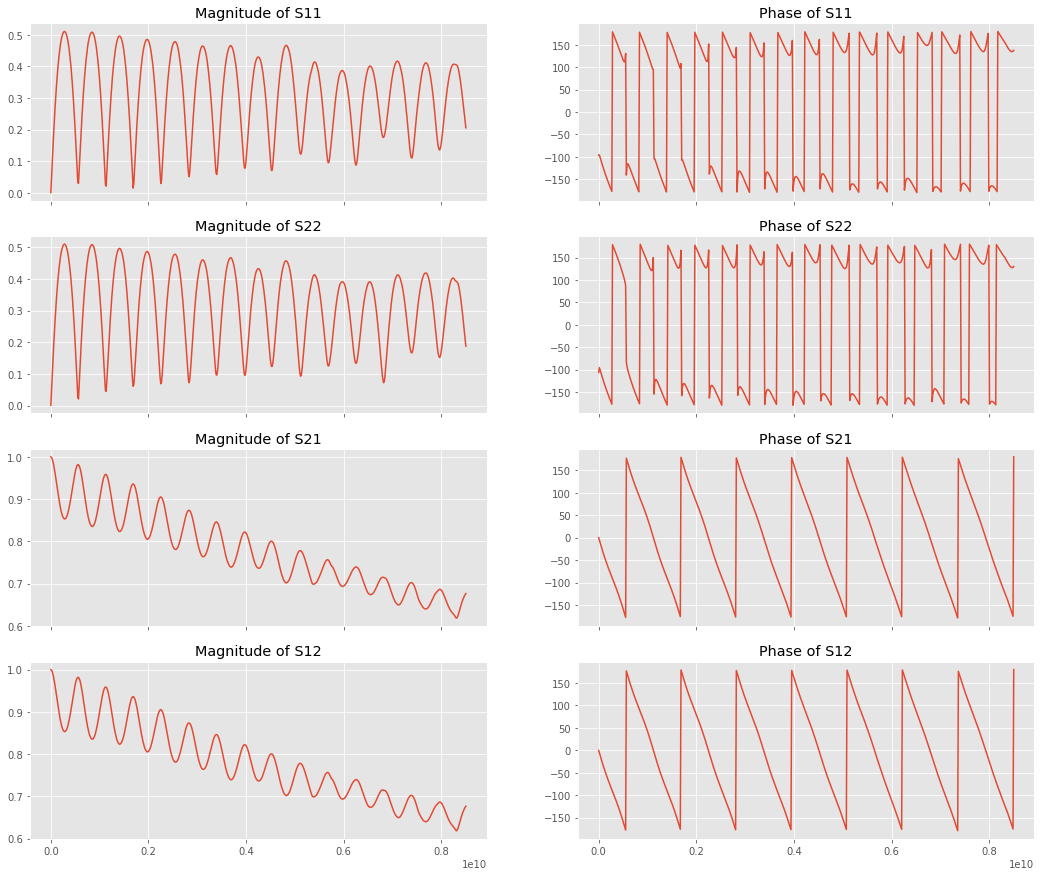

In [65]:
serpentine_example.s_param_plot()

The calculated dielectric constant, loss factor, and loss tangent can be plotted like so:

/anaconda/envs/permittivity/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


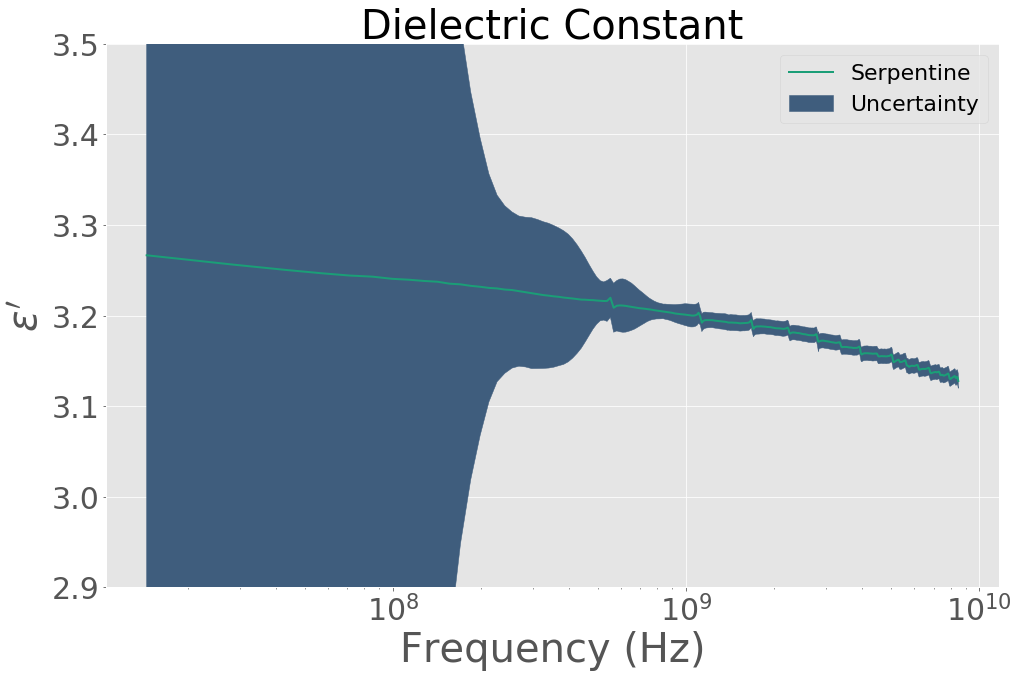

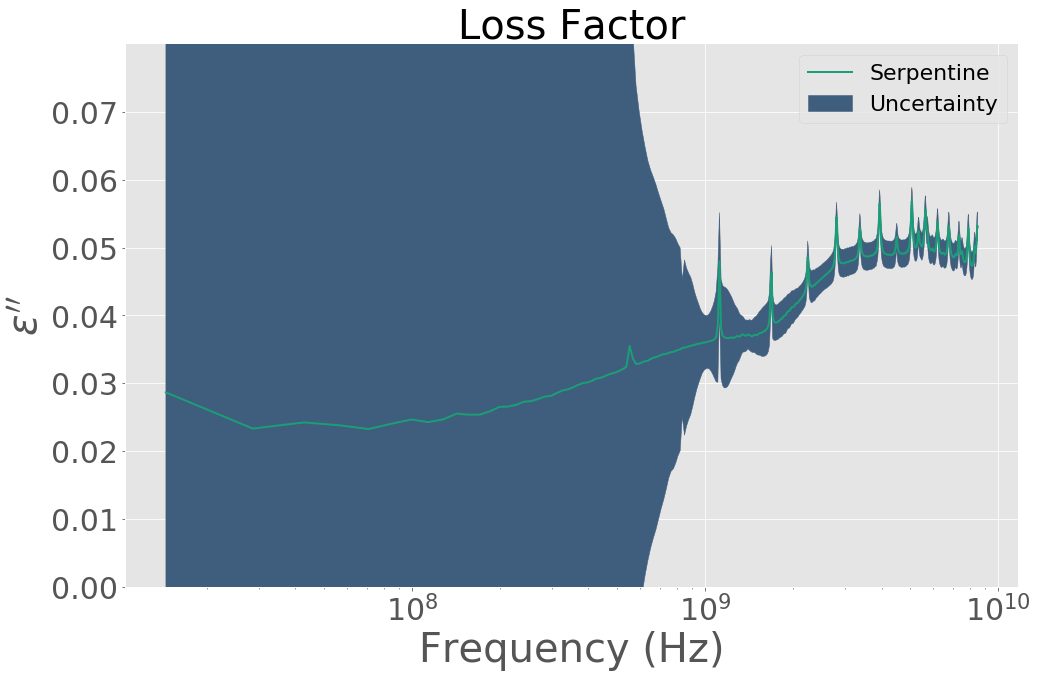

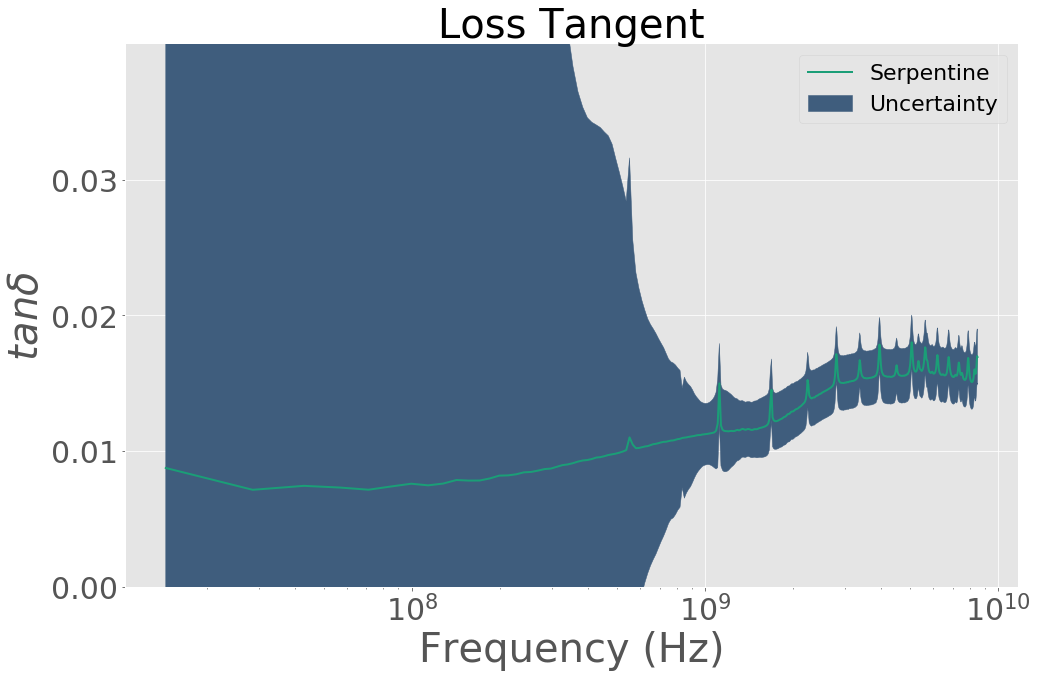

In [66]:
serpentine_example.draw_plots()

Two or more AirlineData instances can be compared to one another using the permittivity compare function.

permittivity_compare requires a list of AirlineData instances to run.

/anaconda/envs/permittivity/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


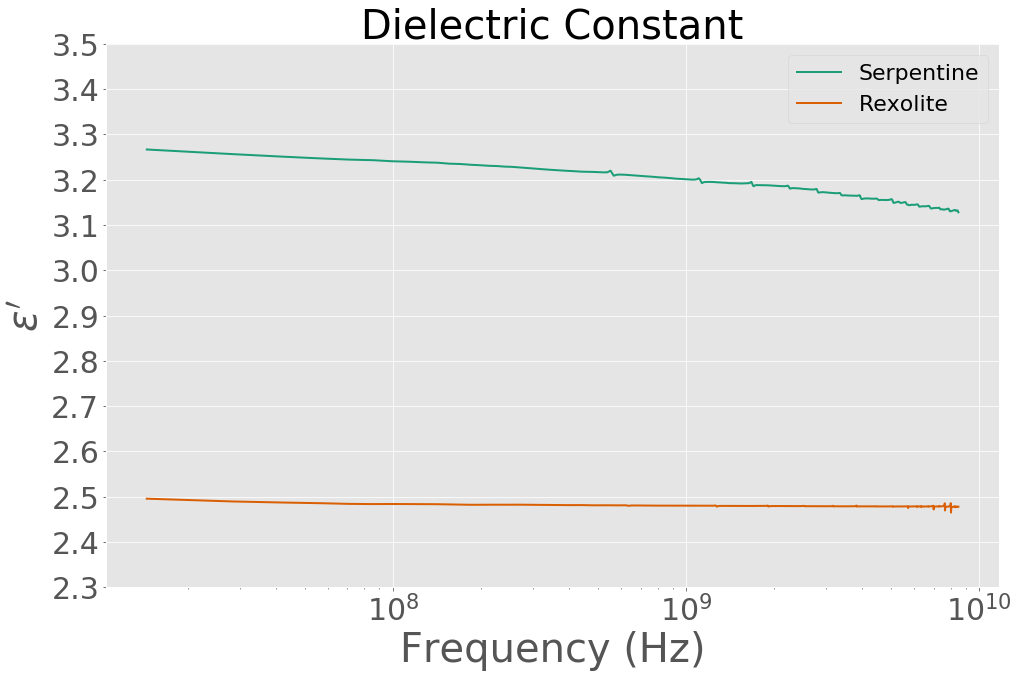

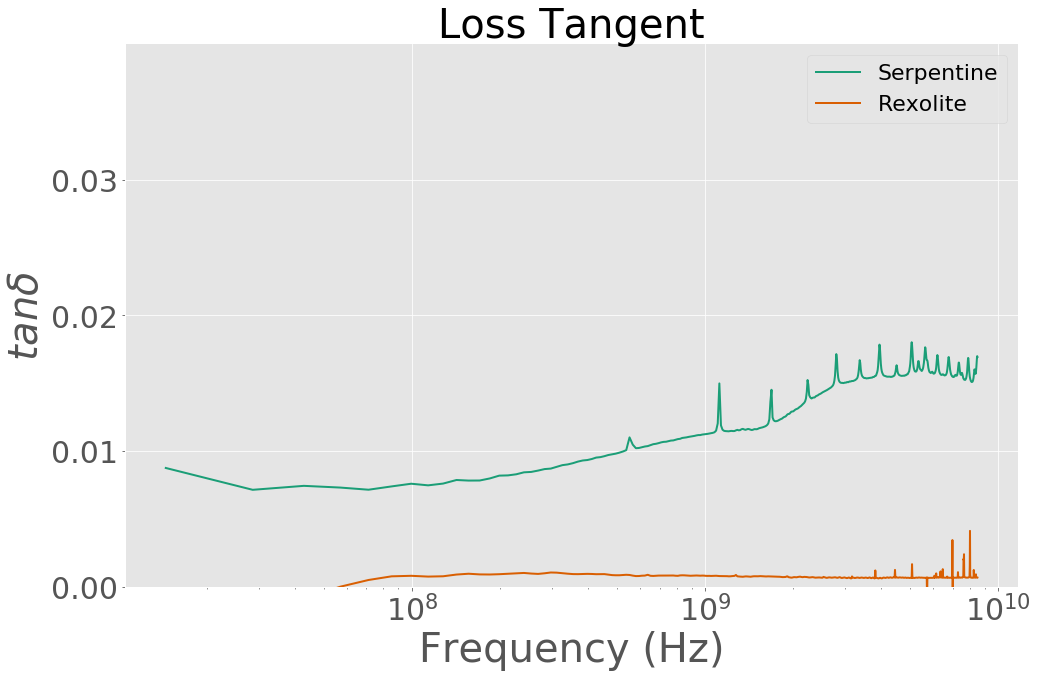

In [67]:
# Make list containing serpentine_example and rexolite_example and name it multi_examples
multi_examples = [serpentine_example,rexolite_example]
# Plot both together
perm_compare(multi_examples)

### Basic File Input

permittivity-calc expects a tab delimited .txt file produced by saving the data table created in VNA Tools II. permittivity-calc will automatically determine whether the file contains uncertainties or not and propagate them automatically if they are present.

*Note: File input is done via the helper function `get_METAS_data` and file in unpacked into in components by the `_unpack` method in AirlineData. If you want to input a file not produced in VNA Tools II, you will need to edit `get_METAS_data` and `_unpack`.*

The run_default function is the simplest way to input a file into permittivity-calc. run_default needs an airline_name to run (Default: `'VAL'`). The default corresponds to the GR900-LZ15 transmission line. Running run_default will produce a File Dialog Prompt using tkinter.

`instance_name = run_default()`

To use a different airline definition, simply set the airline_name. Currently, the options are 'VAL', 'PAL', 'GAL', '7', or 'custom'. Using 'custom' will prompt you to input an airline length `L` in cm.

`instance_name = run_default(airline_name='custom')`

*Note: To create your own airline length definitions, edit the helper functions `get_METAS_data` and `_get_file`*

To open multiple files at once, the function `multiple_meas` can be used.

`list_of_instances = multiple_meas()`

`multiple_meas` will ask you which airline you are using. The name must be given as a string. Once the `airline_name` is given a file dialog will open. Selecting any .txt file in a folder will open all other .txt files in that folder. All measurements must have been made in the same airline.

The airline name can also be supplied directly:

`list_of_instances = multiple_meas(airline_name='custom')`

`multple_meas` returns a list of AirlineData instances and plots all input data together using `perm_compare`. Individual instances can be accessed with indexing.

Example:

`individual_instance = list_of_instances[0]`

### Saving Plots

Permittivity plots can be saved to the /Figues/ folder (folder will be automatically created if it does not exist) by using the `publish` argument. This feature does not currently exist for the S-parameter plots.

*Note: Currently, plots are saved as 300 dpi .png files. These settings can be changed by editing the `make_plot` function in `permittivity_plot.py`.*

Example:

`rexolite_example.draw_plots(publish=True)`

Plots of multiple measurements can also be saved as long as a name is provided for the plots:

`perm_compare(multi_examples,name='save_name',publish=True)`

### Bulk Density Corrections

To correct powder measurements for bulk destiny, the `bulk_density` in g/cm<sup>3</sup> must be provided, `normalize_density` must be set to `True` and, `norm_eqn` must be set to a valid string representing an equation (Default: `'LI'`).

Currently, two equations are available for density normalization:
- The Lichtenecker equation (`'LI'`)
- Landau-Lifshitz-Looyenga equation (`'LLL'`)

For information on how to use these equations see [(Hickson, 2017)](https://doi.org/10.1016/j.asr.2016.08.011)

Example:

`instance_name = run_default(bulk_density=1.8,normalize_density=True,norm_eqn='LLL')`

### Nicholson-Rross-Weir (NRW) Algorithm

By default, permittivity-plot uses the New Non-Iterative Method to calculate the complex permittivity from S-parameters [(Boughriet, 1997)](https://doi.org/10.1109/22.552032) which assumes $\mu$ = 1 (non-magnetic). To use the NRW algorithm instead [(Nicolson & Ross, 1970;](https://doi.org/10.1109/TIM.1970.4313932)[ Weir, 1974)](https://doi.org/10.1109/PROC.1974.9382), `nrw` must be set to `True`.

`instance_name = run_default(nrw=True)`

### Accessing The Data

When no uncertainties are provided in the input file, data in the AirlineData instance are stored as [numpy arrays](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) and can easily be accessed.

When uncertainties are provided, data are stored as [unumpy.uarray](https://pythonhosted.org/uncertainties/numpy_guide.html) objects where each value in the `uarray` has an uncertainty associated with it.

For example, the computed permittivity arrays are stored as `avg_dielec`, `avg_lossfac`, and `avg_losstan`. 

*Note: see the Data Attributes listed in the Cheat Sheet above for a list of all accessible data in an AirlineData instance.*

Creating a copy of a data array simply requires accessing the relevant data attribute. For example:

In [68]:
serpentine_dielec = serpentine_example.avg_dielec

For data when uncertainties, the nominal values can be extracted with `unp.nominal_values()` and the uncertainties can be extracted with `unp.std_devs()`.

In [69]:
serpentine_dielec_data = unp.nominal_values(serpentine_dielec)
serpentine_dielec_unc = unp.std_devs(serpentine_dielec)